## Multi-mode topological amplification

In this notebook, we explore the consequences of the emergence of phases with winding numbers $W>1$ in the phenomenon of topological amplification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from GaussianSystem import *
import scipy as sp
import imageio

# Plotting
styles = ['science']
prefix = 'stylelib/'
sufix = '.mplstyle'
for i in range(len(styles)):
    styles[i] = prefix + styles[i] + sufix
plt.style.use(styles)
plt.rcParams.update({'font.size': 35})
plt.rcParams['axes.linewidth'] = 1 #set the value globally

We will focus on two magnitudes that characterize amplification. One of them is the Green function of the equation of motion for the local cavity mode coherences:

\begin{equation}
G_{ij}(\omega) = \left(\frac{1}{i\omega-i\mathbb{H}}\right)_{ij}\,,
\end{equation}

and the other is the distribution of these coherences, in real and momentum space. 

In [4]:
Gauss= GaussianSystem(50)

def get_params(W, Delta_pi=False):
    """
    Function to get a set of parameters leading to a winding number corresponding
    to input W. The keyword argument Delta_pi, if true, considers a two-mode waveguide
    where (k1-k0) is equal to pi.
    """
    g_s = 0.0
    
    if W == 0:
        
        Gammas = [1]
        kl_s = [0]
        l_k = 10
        pump = 0.0
        
    else:
    
        Gammas = (1/W)*np.ones((W))
        kl_s = np.array([0, np.pi/4, np.pi/8])[:W]
        l_k = 1000
        pump = 0.2
    
    if Delta_pi: 
        
        Gammas = [1/2,1/2]
        kl_s=[0, np.pi]
        l_k = 1000
        pump=0.2
    
    params = Gauss.create_params(Gammas, kl_s, pump, g_s, l_k)
    
    return params
    
    
def plot_scattering_matrix(ax, W):
    """
    Function to plot the Green function in an input axis 'ax'. 
    """
    # Get parameters for input W
    params = get_params(W)
    
    # Get the dynamical matrix
    
    # Invert and evaluate |G(omega=0)|.
    A = Gauss.get_H_nh(params)
    A_inv = np.linalg.inv(A)[:Gauss.N//2, :Gauss.N//2]
    
    # Plot
    im = ax.imshow(np.abs(A_inv))
    cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.045, pad=0.05)
    cbar.set_label('$|G_{ij}(\omega=0)|$', fontsize=35)
    ax.set_xlabel('$i$', fontsize=35)
    ax.set_ylabel('$j$', fontsize=35)

0.0
1.0


/home/carlos/Desktop/Chiral_Multimode_Physics/GaussianSystem.py:359: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  nu += (1/(2*np.pi))*integrate.quad(imag_f, -np.pi, np.pi)[0]


2.0


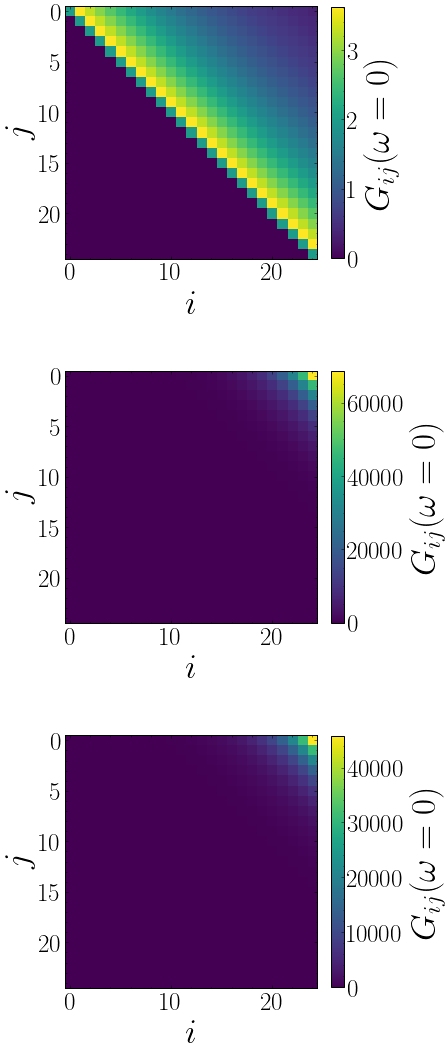

In [135]:
fig, axes = plt.subplots(nrows=3, figsize=(5,19))
for i in range(3):
    plot_scattering_matrix(axes[i], i)
plt.savefig('images/S_matrices.svg')

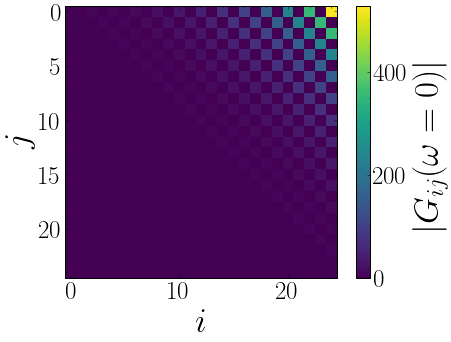

In [168]:
# Particular case of two-mode waveguide with k1-k0 = pi

params = get_params(2, Delta_pi=True)
A = Gauss.get_H_nh(params)
A_inv = np.linalg.inv(A)[:Gauss50.N//2, :Gauss50.N//2]

fig, ax = plt.subplots(figsize=(7,5))
im = ax.imshow(np.abs(A_inv))
cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.045, pad=0.05)
cbar.set_label('$|G_{ij}(\omega=0)|$', fontsize=35)
ax.set_xlabel('$i$', fontsize=35)
ax.set_ylabel('$j$', fontsize=35)
plt.savefig('images/S_matrices_Delta_pi.svg')

Now, let us focus on the steady state coherences, given by $\langle b_\text{ss}\rangle = \mathbb{H}^{-1}\mathbf{\Omega}$, where $\mathbf{Omega}_j=\Omega\delta_{jN}$ is a vector characterizing an input coherent drive at the rightmost site of the lattice. We will be interested as well in the shape of its discrete Fourier transform, defined as:
\begin{equation}
\langle b_k\rangle_\text{ss} = \frac{1}{\sqrt{N}}\sum_j e^{-ikj}\langle b_j\rangle_\text{ss}
\end{equation}

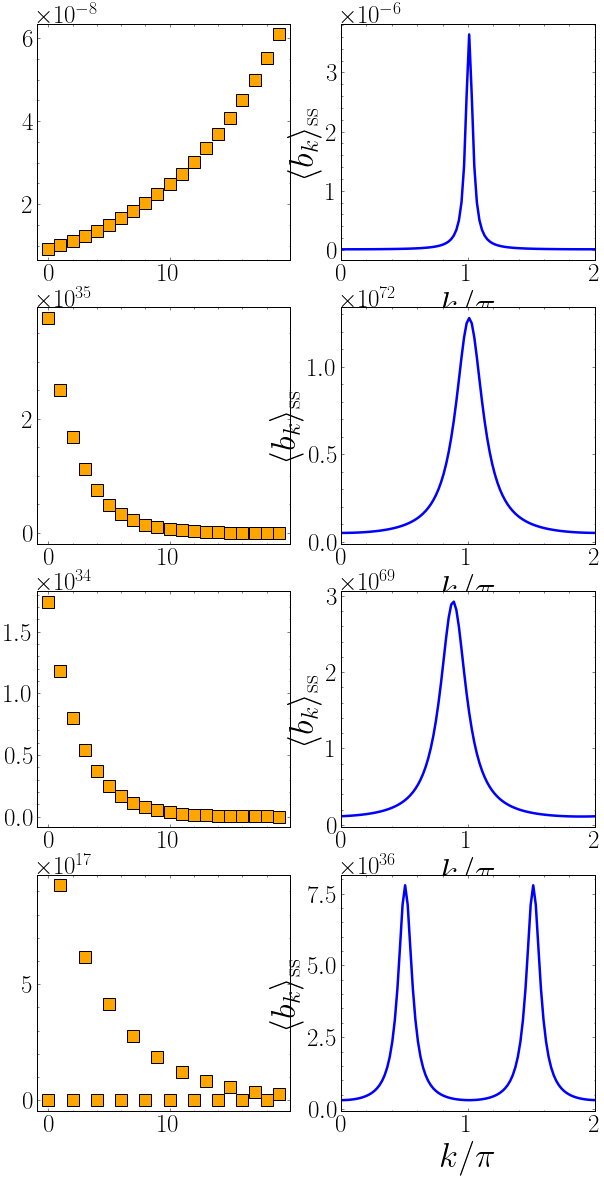

In [273]:
Gauss = GaussianSystem(200)

fig, axes = plt.subplots(figsize=(10, 20), ncols=2, nrows=4)
    
for i in range(4):
    
    if i == 3:  params = get_params(2, Delta_pi=True)
    else: params = get_params(i)
        
    # Coherent driving in rightmost site
    f = np.zeros((Gauss.N))
    f[-1] = 1
        
    # Build dynamical matrix and get steady state
    A = Gauss.get_dynamical_matrix(params)
    b_ss = Gauss.get_steady_state_coherences(A, f)
    b_ss = b_ss[:len(b_ss)//2]
    b_k = np.abs(np.fft.fft(b_ss[:len(b_ss)//2])**2)
    
    axes[i, 0].plot(range(20), np.abs(b_ss[:20]), 's', markersize = 12, mec='black',
           label='Exact', color='orange')
    axes[i,1].plot(np.linspace(0, 2, len(b_k)), b_k, linewidth=2.5, color='blue')
    axes[i,1].set_xlim([0, 2])
    axes[i,1].set_ylabel('$\langle b_k\\rangle_\\text{ss}$', fontsize=35)
    axes[i,1].set_xlabel('$k/\pi$', fontsize=35)
plt.savefig('images/b_k_ss.svg')

To understand the qualitative shape of the steady state coherences, we investigate the spectrum of the doubled Hamiltonian associated to the system, defined as:
\begin{equation}
\mathcal{H} = \begin{pmatrix}
0 & \mathbb{H}\\
\mathbb{H}^\dagger & 0
\end{pmatrix}
\end{equation}

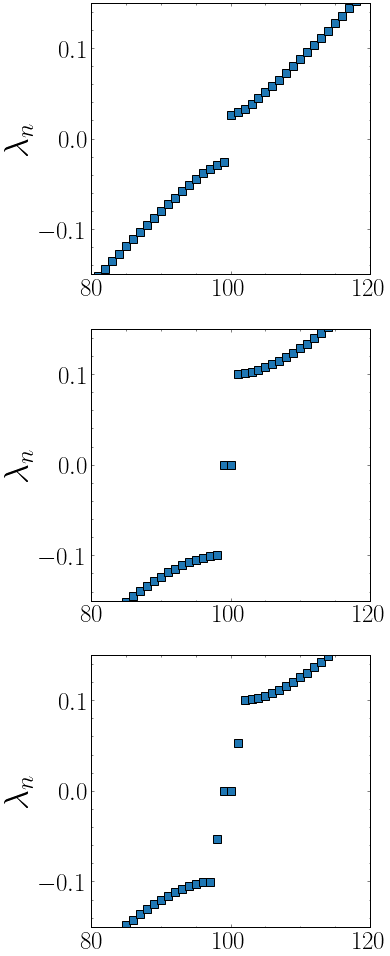

In [243]:
fig, axes = plt.subplots(nrows=3, figsize=(5,17), sharey=True)

for i in range(3):
    
    params = get_params(i)
    #H = Gauss.get_doubled_Hamiltonian(Gauss.get_H_nh(params))
    H = Gauss.get_doubled_Hamiltonian( 1j*params['pump']*np.eye(Gauss.N)/2 + Gauss.get_H_eff(params))
    eigvals = np.linalg.eigvalsh(H)
    axes[i].plot(range(len(eigvals)), eigvals, 's', mec='black', markersize=8)
    axes[i].set_ylim([-0.15,0.15])  
    axes[i].set_xlim([80,120])
    axes[i].set_ylabel('$\lambda_n$', fontsize=35)
    #axes[i].set_xlabel('$n$', fontsize=35)

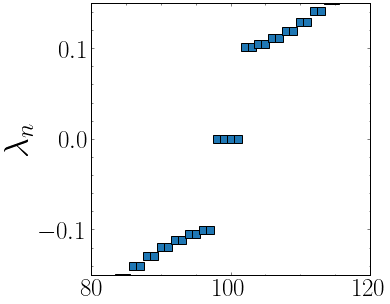

In [245]:
# Particular case of two-mode waveguide with (k_0-k_1)=pi

params = get_params(2, Delta_pi=True)
fig, ax = plt.subplots(figsize=(5,5))
H = Gauss.get_doubled_Hamiltonian(1j*params['pump']*np.eye(Gauss.N)/2 + Gauss.get_H_eff(params))
eigvals = np.linalg.eigvalsh(H)
ax.plot(range(2*Gauss.N), eigvals, 's', mec='black', markersize=8)
ax.set_ylim([-0.15,0.15])  
ax.set_xlim([80,120])
ax.set_ylabel('$\lambda_n$', fontsize=35)